# ML Project_Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Importing datasets

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


This dataset contains the details of customer in which both numerical and categorical data are present.
Here "Churn" is the target variable which contains 2 categories so it will be turned as "classification problem"
where we need to predict the several churn using the classification

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Exploratory Data Analysis (EDA)

In [4]:
# checking the dimension of the dataset
df.shape

(7043, 21)

This datasets contains 7043 rows and 21 columns. out of which 1 is target variable and remaining 20 are independent variables.

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.columns.tolist()   # checking the columns of dataset

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [7]:
df.dtypes #  checking the types of columns

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There are 3 different type of data(int64,float and object)present in the dataset.

# np.nan,None,NaN,others

In [8]:
df.isnull().sum()  # Checking the null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As we can see there are no null values present in this dataset.

(df.isnull().sum()   used to  check the null value present in your columns and  .sum() method take the sum of all the null value present in the one features (columns))

<AxesSubplot:>

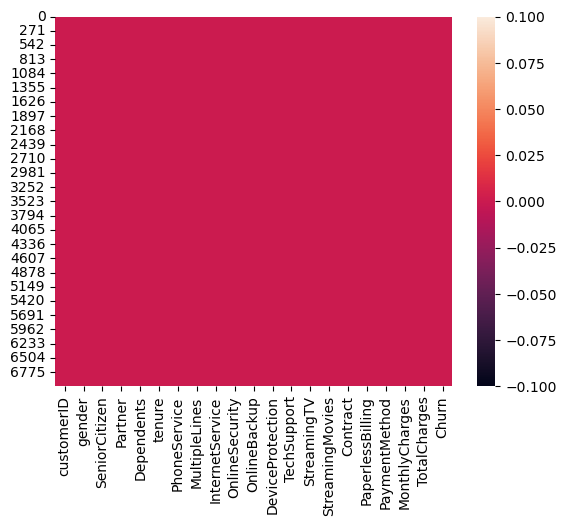

In [9]:
# lets visualize it using heatmap

sns.heatmap(df.isnull())

And we can clearly visualize that there is no missing data present. 

In [10]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 This gives the brief about the dataset which includes indexing type, columns,no null values and memory usage.

In [11]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
df['TotalCharges'].nunique()

6531

In [13]:
# Checking the values counts of each column

for i in df.columns:
    print(df[i].value_counts())
    print("\n") 


7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

These are the values counts of all columns and we can see blank in TotalCharge column. Lets check out the unique values of that column.

In [14]:
# Checking the unique values of TotalCharge column

df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [15]:
df.shape[0]

7043

We can notice that "TotalCharge" has continuous data but its reflacting as object datatype .And 11 records of this column has blank data .
lets handle this column.

In [16]:
# Checking the space in TotalCharges column
df.loc[df["TotalCharges"]==" "] 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


By locating the TotalCharges we can find this column has space as values but it was showing 0 missing values in this column. Lets fill this column by some values.

In [17]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

White space are not present here now, 
All the unique values here .. dot dot – but  not visible all the values here .somewhere nan values present.

In [18]:
# converting object datatype to float datatype
df["TotalCharges"] = df["TotalCharges"].astype(float)
df["TotalCharges"].dtype

dtype('float64')

Now we can see total charges columns has some space values which is replaced by nan values.Now we handle the nan values

we have converted the datatype of "TotalCharges"from object to float.

In [19]:
# Lets check null values again 

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we have blank spaces with nan values in TotalCharges,its showing 11 null values in that column.

Replacing the NaN  values using mean method as the data has continuous values.

In [20]:
np.mean(df["TotalCharges"])

2283.3004408418697

In [21]:
df.iloc[488,:]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [22]:
# Checking the mean of TotalCharges column
print("The mean value of TotalCharges is:",df["TotalCharges"].mean())

The mean value of TotalCharges is: 2283.3004408418697


In [23]:
# Filling null values in TotalCharges with its mean

df["TotalCharges"]= df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [24]:
df.iloc[488,:]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2283.300441
Churn                                      No
Name: 488, dtype: object

In [25]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

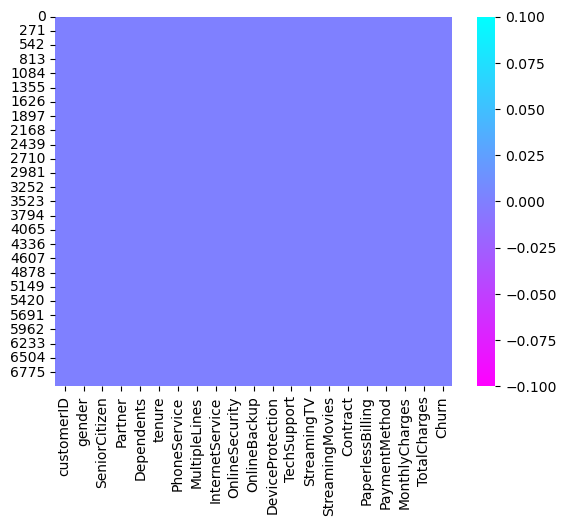

In [26]:
# Lets check the null values again
sns.heatmap(df.isnull(),cmap ="cool_r")

Now we can see there are no missing values in any of the column.

In [27]:
# seperating Numerical and Categorical columns

# Checking for Categorical columns

categorical_col =[]

for i in df.dtypes.index:
    if df.dtypes[i] =="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

# Checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print ("Numerical columns:",numerical_col)

Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [28]:
# checking number of unique values in each column

df.nunique().to_frame("No.of unique values")

,No.of unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


These are the unique values present in the daraset. Here CustomerID column has the data of unique ID to thecustomers which can be dropped. 

(I hope u have learned all the irrelevent data where there are only  single values present in whole column or if there is feature that have irrelevent data  there are all the unique value  then we can drop them. )

In [117]:
# Droping customer ID column

df.drop('customerID',axis =1, inplace =True)

In [118]:
# Checking the list of counts of target

df["Churn"].unique() 

array([0., 1.])

These are two categories present in the target column namenly “Yes” and “No”

In [31]:
# Checking the unique values in tagget column
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

We can assume that “NO” stands for the customers who have not churned and “Yes” stands for the customers who have got churned from the company.

# Description of Dataset

In [32]:
# Statistical summary of numerical columns

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


This gives the statistical informed of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present.

From the above description we can absoerve the following:-

1)	The counts of all the columns are same which means there are no missing values in the dataset.

2)	The means value is greater than the median(50%) in tenure and Totalcharges columns which means the data is skewed to right in these

3)	The data in the colum MonthlyCharges have mean vlaue less than median which means the data is skewed to left.

4)	By  summarizing the data we can observe there is huge differeces between 75% and max hence there are outliers present in the data.

5)	We can also notice the standard deviation, min,25% percantile values from this describw method


Note:

MonthlyCharges column – mean is less (64.76) than the median(50%) 70.35000 so this column skwed to left

TotalCharges column- mean(2283.3000) is greater than  than the median(50%) 1400.55 so  it means this column data skwed to Right


If want  checking differernce between for 3rd quartile (75%) and max:  In the TotalCharges column there is huge difference  75%-3786.60  max- 8684.800 means outliers are present in the my TotalCharges Column. As well as Monthly chages.

100% I am not telling outlier are present it might be chance.


Non Graphical analysis is completed.

# Data Visualization

Data visua;ization there are 3 parts 

1.Univariate analysis : when we are considering only one column for the  analysis. We are doing the anaysis on only single features(column) then we are saying it as Univariate analysis


# Univariate Analysis

No     5174
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

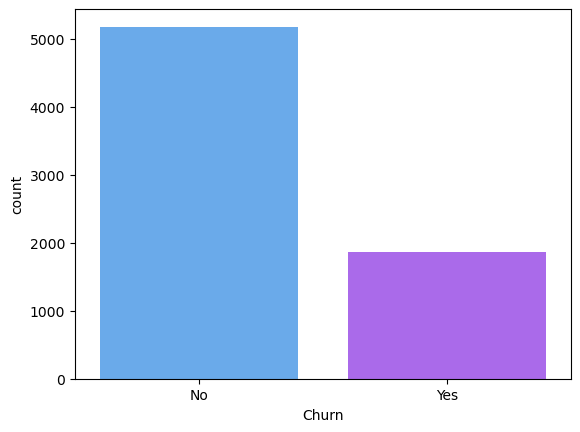

In [33]:
# Visualize the number of Churned customers

print(df['Churn'].value_counts())
sns.countplot(x= df['Churn'],palette ="cool")

We can observe the that the count of “No Churn” are high compared to the count of “Yes Churn” i.e there are more number of customers who have not churned.

This lead to class imbalance issue in the data. we will rectify it by using oversampling method in later part.


Male      3555
Female    3488
Name: gender, dtype: int64


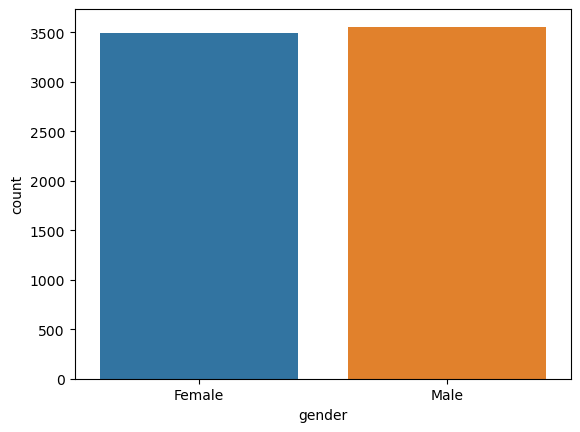

In [34]:
#Visualizing the count of Gender 

print(df ['gender'].value_counts())
ax=sns.countplot(x='gender',data=df)
plt.show()

Form the plot we can observe that the total number of males and females are almost same.

note:
Both number of class ratio of class  are almost equal  if there is huge difference between these 2 class again we wre not saying class imbalance problem because this not my tartget variable.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


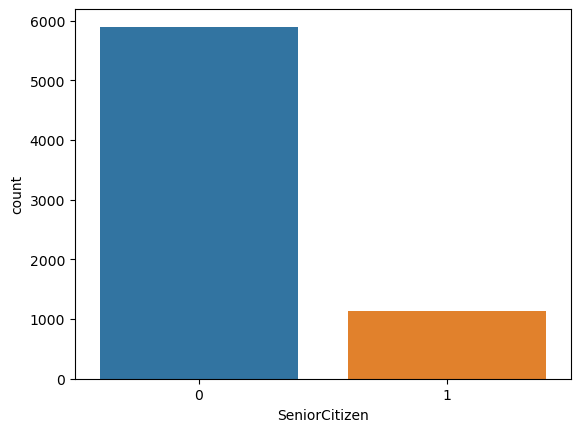

In [35]:
# Visualizing the count of SeniorCitizen

print(df ['SeniorCitizen'].value_counts())
ax=sns.countplot(x='SeniorCitizen',data=df)
plt.show()

Here 0 represent non senior citizens and 1 represents senior citizens. The count of is high compared to 1 which means the number of non senior citizens are quite high compared to senior citizens data in the dataset.

No     3641
Yes    3402
Name: Partner, dtype: int64


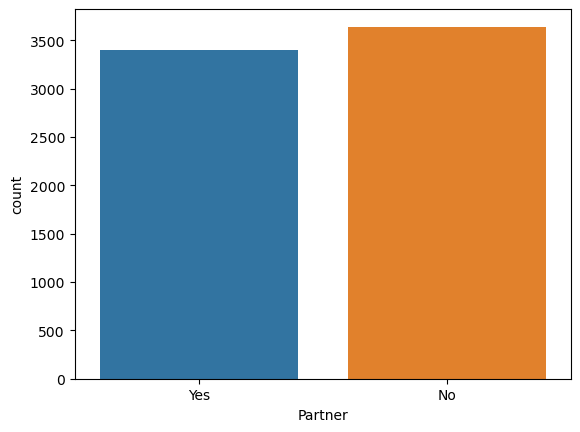

In [36]:
# Visualizing the count of patrner

print(df ['Partner'].value_counts())
ax=sns.countplot(x='Partner',data=df)
plt.show()

Non patner are bit high in count of customers having partner.

No     4933
Yes    2110
Name: Dependents, dtype: int64


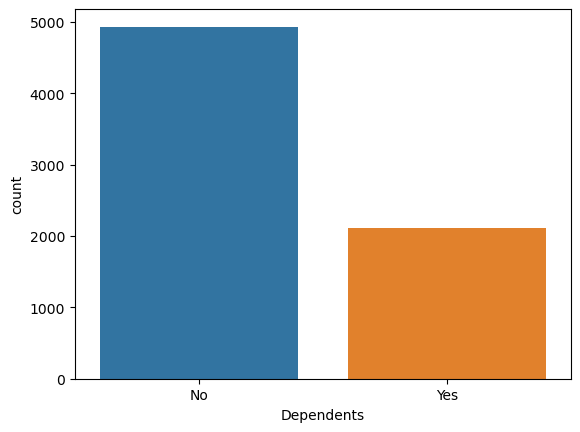

In [37]:
# Visualizing the count of Dependents

print(df ['Dependents'].value_counts())
ax=sns.countplot(x='Dependents',data=df)
plt.show()

The customer who have dependents are less compared to non dependents

Yes    6361
No      682
Name: PhoneService, dtype: int64


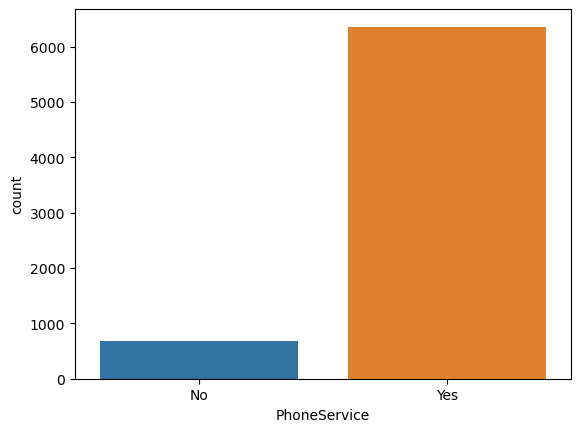

In [38]:
# Visualizing the count of PhoneService

print(df ['PhoneService'].value_counts())
ax=sns.countplot(x='PhoneService',data=df)
plt.show()

The customer who have phone service are large in number and who do not own phone services are very less in number

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


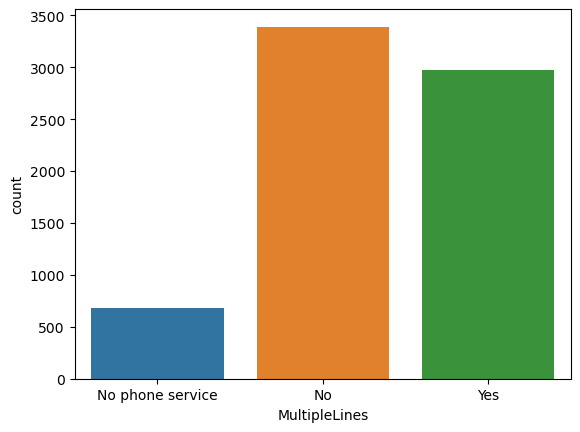

In [39]:
# Visualizing the count of  MultipleLines

print(df ['MultipleLines'].value_counts())
ax=sns.countplot(x='MultipleLines',data=df)
plt.show()

The customer having Phoneservice fron single line have high counts compared to the customer having phone services from multiple lines, also the customers who do not have phone services have covered very less data comared to others.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


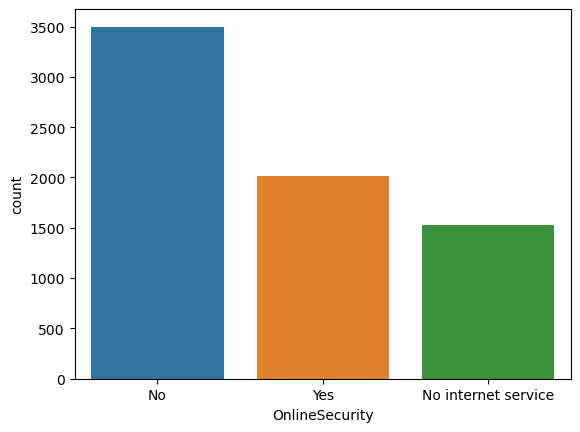

In [40]:
# Visualizing the count of  OnlineSecurity

print(df ['OnlineSecurity'].value_counts())
ax=sns.countplot(x='OnlineSecurity',data=df)
plt.show()

we can observe that the customer having no internet service have less online backup counts  compared to others.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


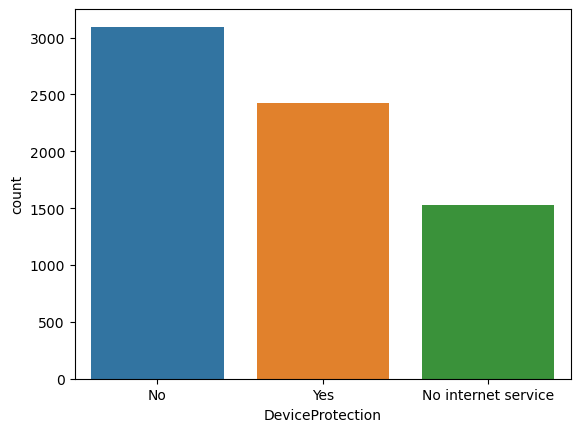

In [41]:
# Visualizing the count of  DeviceProtection

print(df ['DeviceProtection'].value_counts())
ax=sns.countplot(x='DeviceProtection',data=df)
plt.show()

we can see the customer who do not have internet connection access, they don’t need any device

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


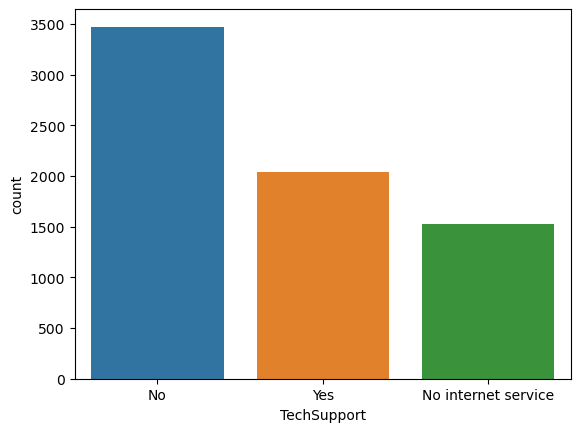

In [42]:
# Visualizing the count of  TechSupport

print(df ['TechSupport'].value_counts())
ax=sns.countplot(x='TechSupport',data=df)
plt.show()


The customer who do not need any technical support are high in counts compared to the customer  who need technical support


No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


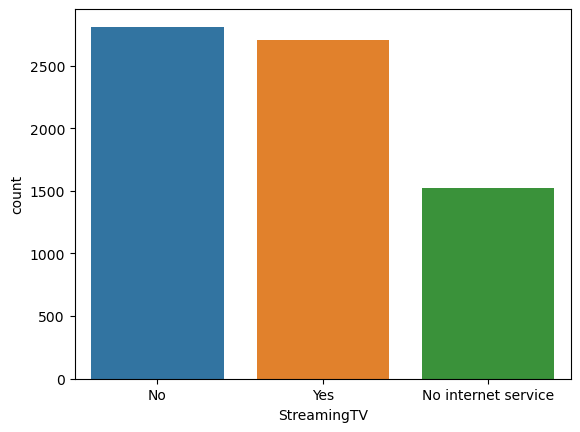

In [43]:
# Visualizing the count of StreamingTV

print(df ['StreamingTV'].value_counts())
ax=sns.countplot(x='StreamingTV',data=df)
plt.show()

The customer who do not use streaming TV are liitle bit high in numbers who do use Streamimng Tv ,and the customer who do not own internet they do not have this service much.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


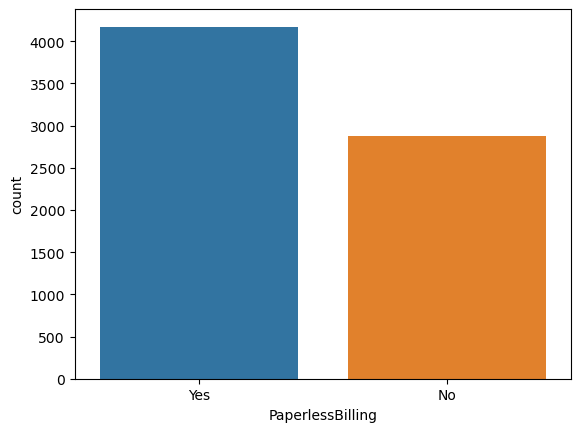

In [44]:
# Visualizing the count of PaperlessBilling

print(df ['PaperlessBilling'].value_counts())
ax=sns.countplot(x='PaperlessBilling',data=df)
plt.show()

Most of the customer prefer PaperlessBilling and average number of customer who do not prefer PaperlessBilling,
they may like to receive billing .

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


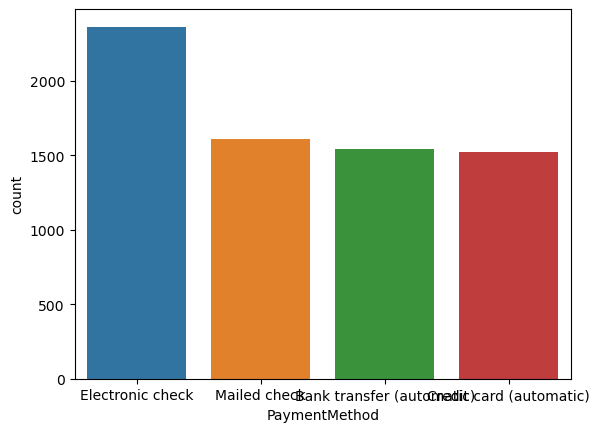

In [45]:
# Visualizing the count of PaymentMethod

print(df ['PaymentMethod'].value_counts())
ax=sns.countplot(x='PaymentMethod',data=df)
plt.show()

Most customer prefer electronic check payemt method and the customer who prefer Mailed Check , bank transfer,and credit card  have average in count.

In [46]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Lets check how the data has been distributed  in remaining in column

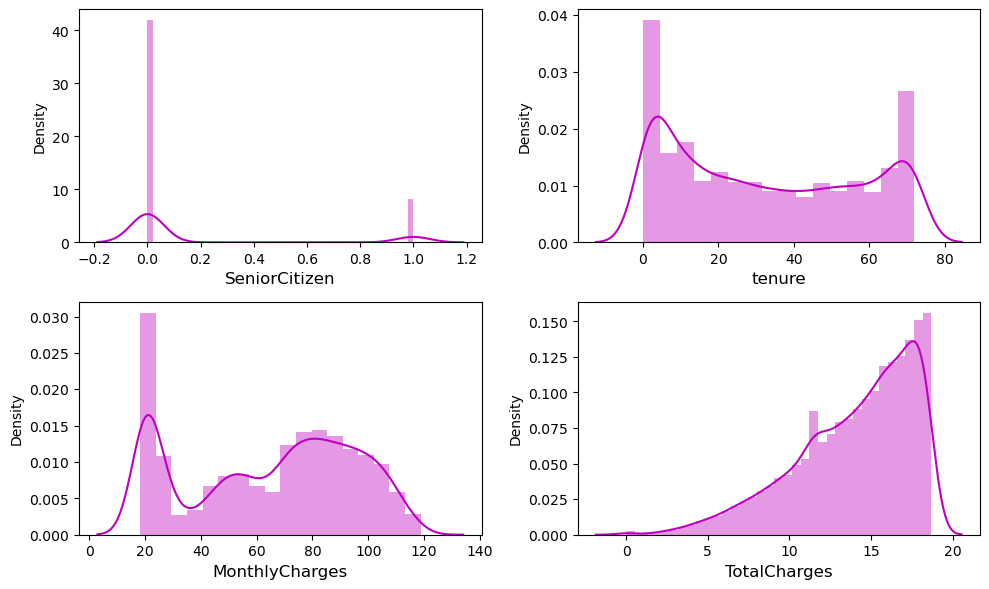

In [116]:
#lets check how the data has been distributed  in remaining in column:
plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[col], color = "m")
        plt.xlabel(col,fontsize = 12)
        plt.yticks(rotation = 0,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

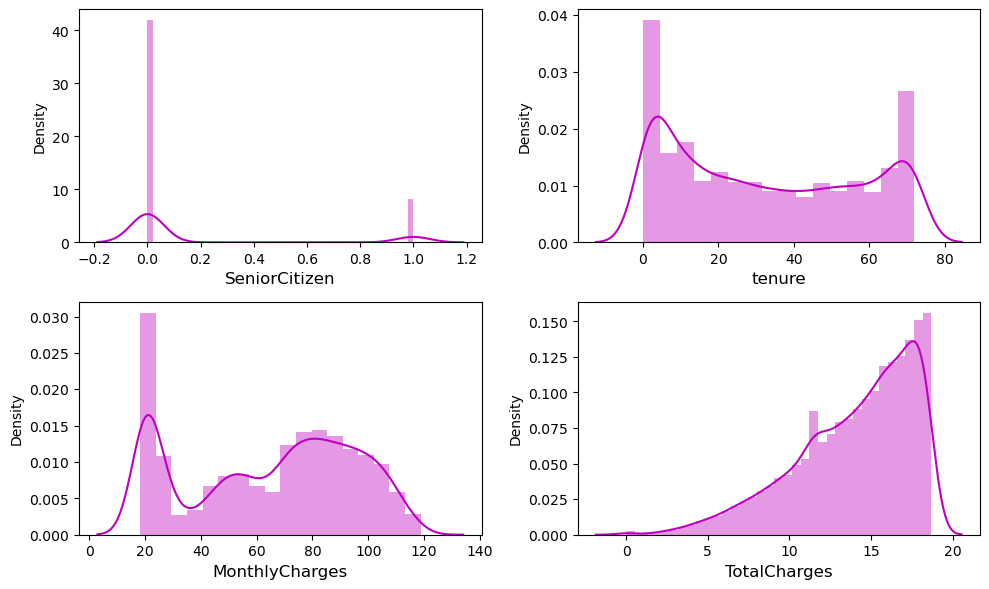

In [119]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(df[col], color = "m") 
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
        plotnumber+=1
plt.tight_layout()

From the above distribution plots we can notice that the data almost looks normal in all the column except Senior Citizen,and the data in the column TotalCharges is skewed to the right. Other 2 columns tenure and Monthly Charges do not have skewness.

# Bivariate Analysis

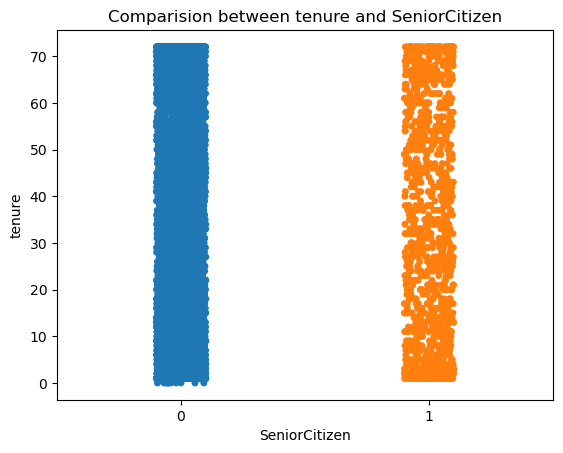

In [49]:
#Comparing tenure and SeniorCitizen
plt.title("Comparision between tenure and SeniorCitizen")
sns.stripplot(x="SeniorCitizen",y = "tenure", data =df)
plt.show()

There is no signification between the features,here both the feature are is equel length

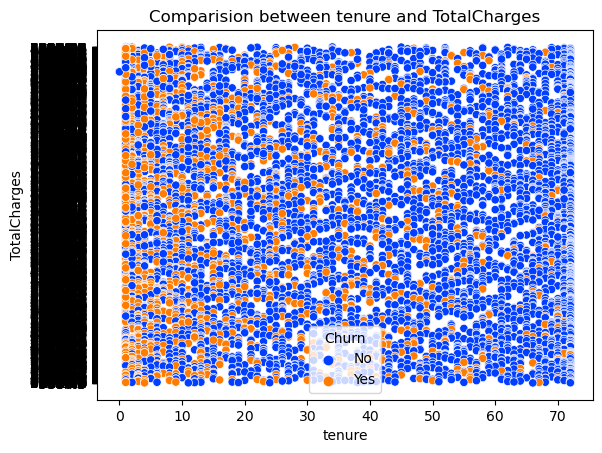

In [50]:
#Comparing tenure and SeniorCitizen
plt.title("Comparision between tenure and TotalCharges")
sns.scatterplot(x= "tenure",y = "TotalCharges", data =df, hue = 'Churn',palette = 'bright')
plt.show()

Here we can notice the strong linear relation between the features.

As the tenure increases,TotalCharge also increases rapidly. If the customers have low tenure services than therw is high chance of churn,


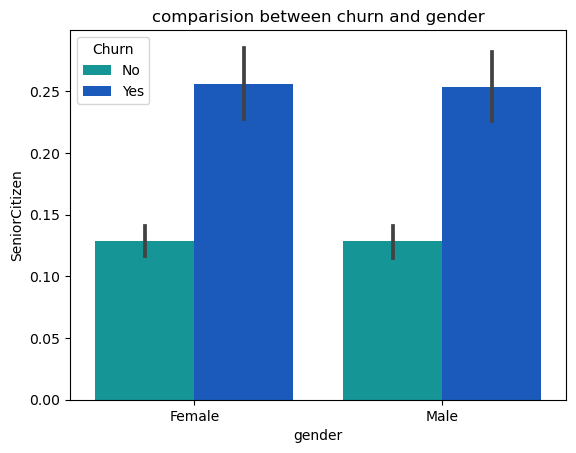

In [51]:
# comparing gender and SeniorCitiZen on the basis of Churn

plt.title("comparision between churn and gender")
sns.barplot(x ='gender', y = 'SeniorCitizen',data = df,palette ='winter_r', hue = 'Churn')
plt.show()

There is no signifiant difference between the columns.The customer churns remains unaffected in gender  and Senior Citizen case.

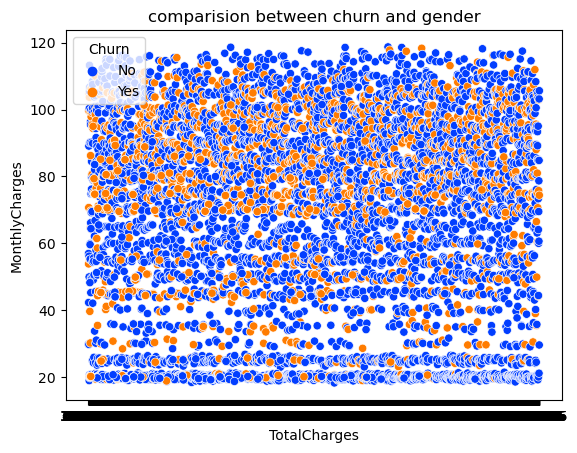

In [52]:
# comparing gender and SeniorCitiZen on the basis of Churn

plt.title("comparision between churn and gender")
sns.scatterplot(x ='TotalCharges', y = 'MonthlyCharges',data = df, hue = 'Churn',palette = 'bright' )
plt.show()

There is a linear relationship between the features. The customer with high monthly charges have high tendency to stop the services since they have high total charge.
Also if the customers ready to contribute with the monthly charges then there is an increment in the total charges.


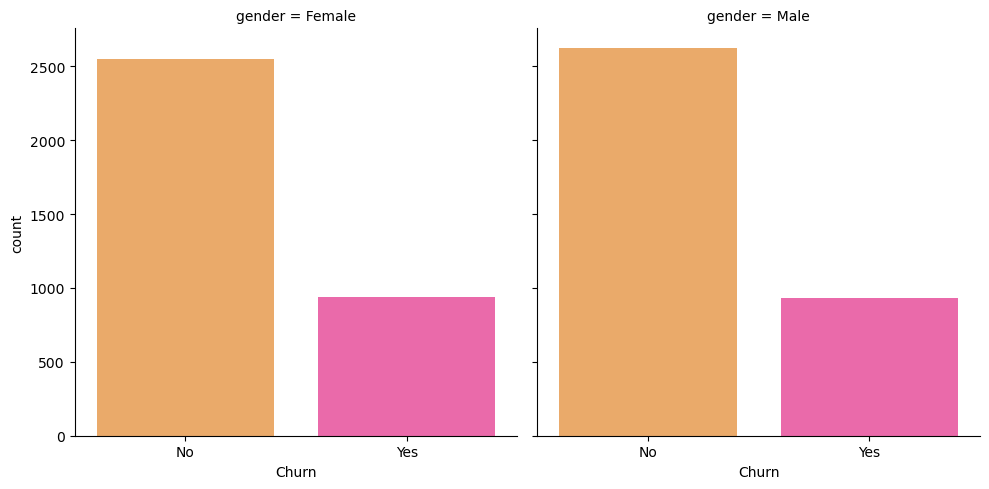

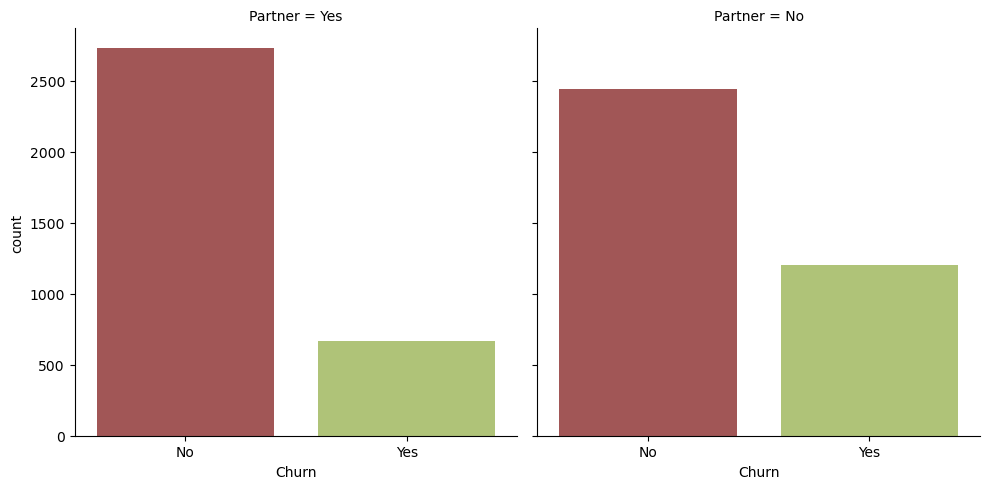

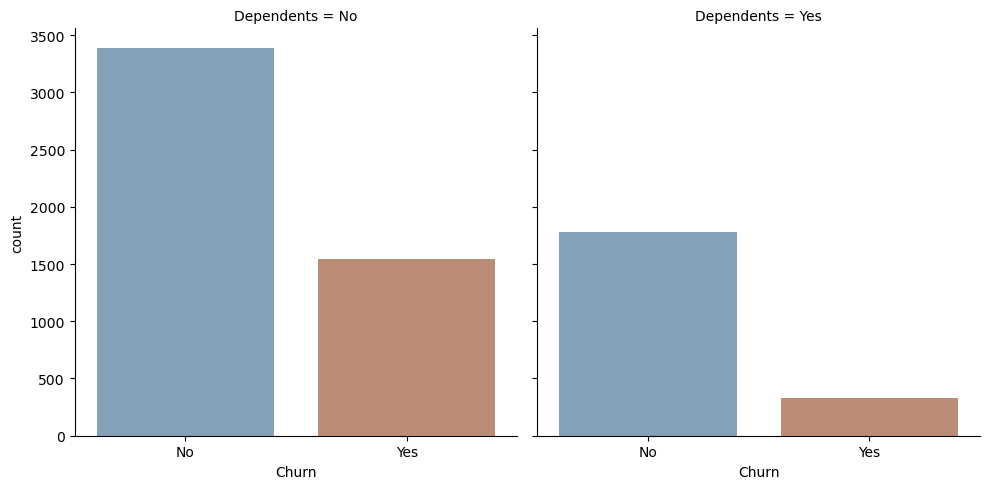

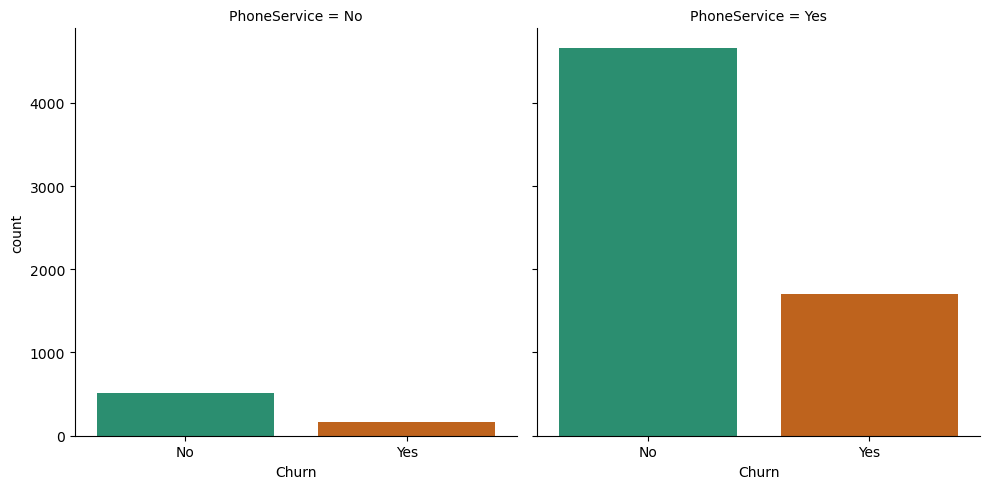

In [53]:
# Checking Churn level and gender 
sns.catplot(x = 'Churn', col ='gender', data=df, kind = "count", palette = "spring_r")

# Checking Churn level and partner
sns.catplot(x = 'Churn', col ='Partner', data=df, kind = "count", palette = "tab20b_r")

# Checking Churn level is Dependents
sns.catplot(x = 'Churn', col ='Dependents', data=df, palette = "twilight_shifted", kind = "count")
              
# Checking Churn level is PhoneService
sns.catplot(x = 'Churn', col ='PhoneService', data=df, palette = "Dark2", kind = "count")

plt.show()

1.	In the first plot we can see there is no significant difference in the genders, both the genders have equal churn level.

2.	In the second plot we can see the customer without partner have high churn rate compared to the customer with partner.

3.	The customer who do not have any dependency have high churn rate compared to the customer who have dependents.

4.	In the last plot we can notice the customers who have phone service have high tendency of getting churned.


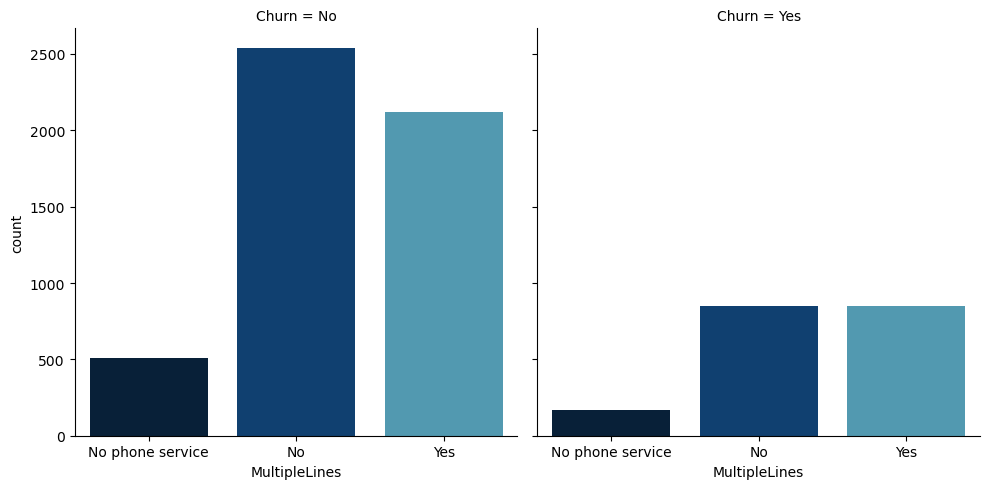

In [54]:
#Checking the churn level and MultipleLines
sns.catplot(x = 'MultipleLines', col ='Churn', palette = "ocean" ,kind = "count", data=df )
plt.show()

The Customers who have phone services from single line have high churn rate compared to the customer having 
phone services from multiple lines,also  there are very less number of customers  who do not have phone  service

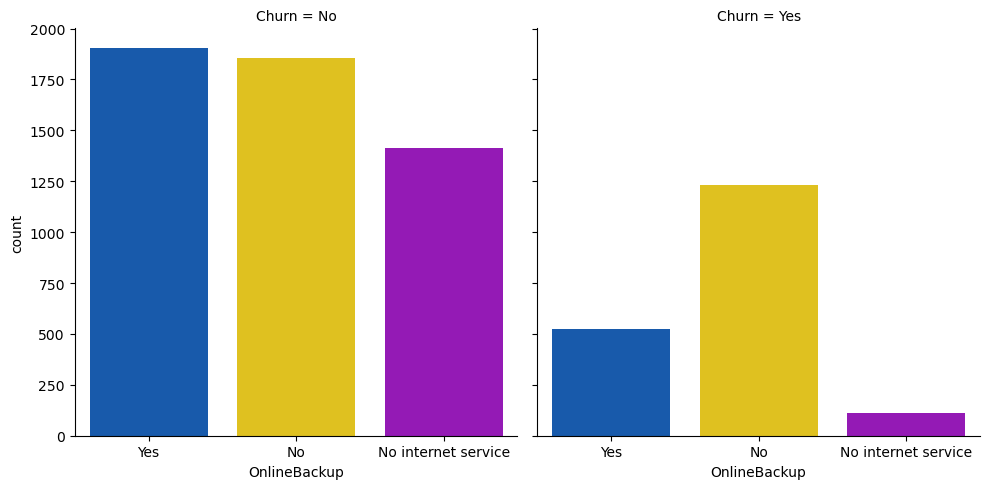

In [55]:
#Checking the churn level and OnlineBackup
sns.catplot(x = 'OnlineBackup', col ='Churn', palette = "prism" ,kind = "count", data=df )
plt.show()

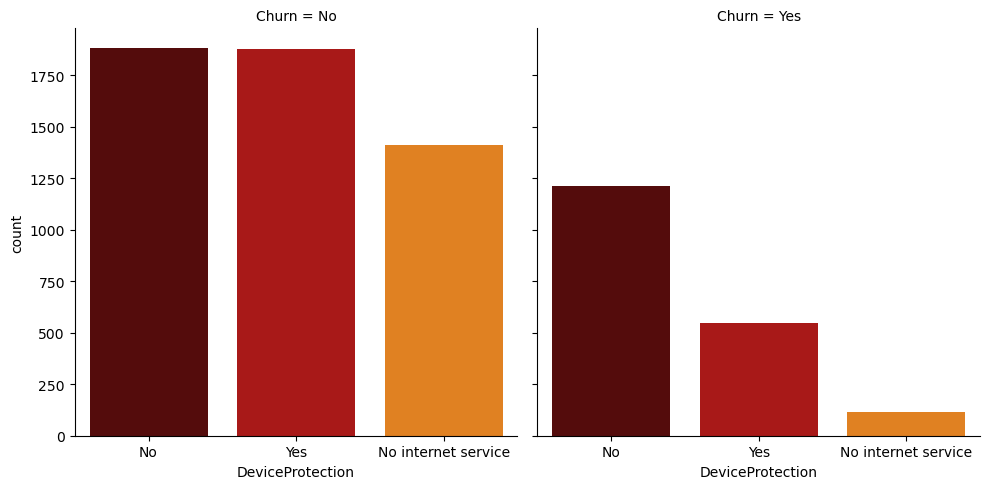

In [56]:
#Checking the churn level and DeviceProtection
sns.catplot(x = 'DeviceProtection', col ='Churn', palette = "gist_heat" ,kind = "count", data=df )
plt.show()

The customer who do not own any device protection have high churn rate compared to others

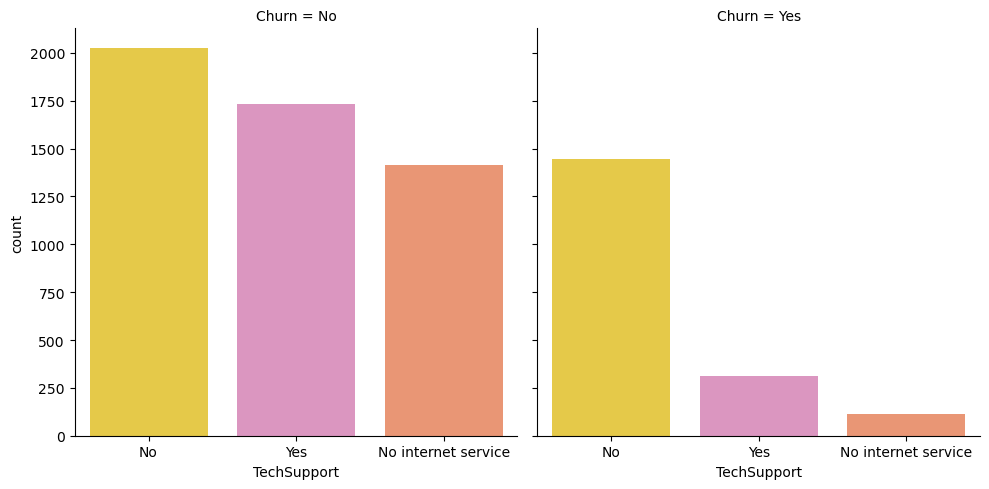

In [57]:
#Checking the churn level and TechSupport
sns.catplot(x = 'TechSupport', col ='Churn', palette = "Set2_r" ,kind = "count", data=df )
plt.show()

Here we can clearly see that the customer who do not have any techsupport then they have high churn ratio

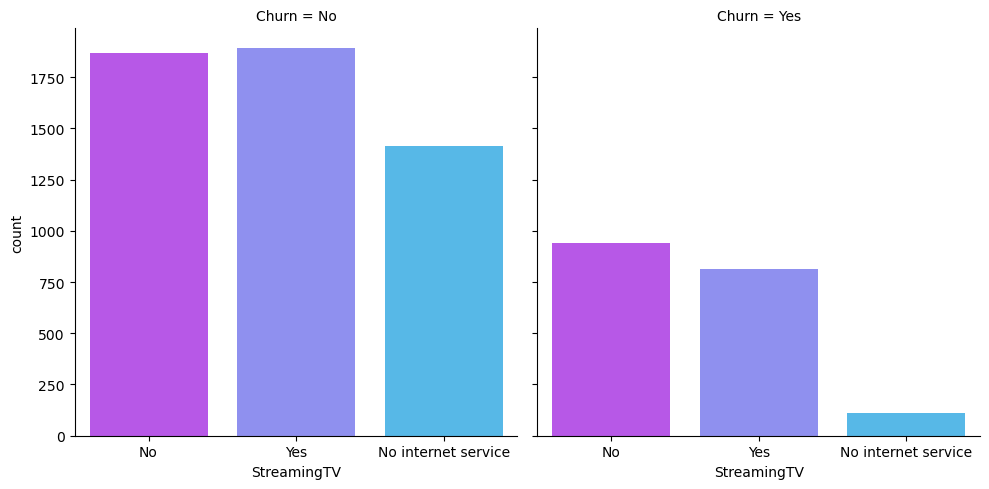

In [58]:
#Checking the churn level and StreamingTV
sns.catplot(x = 'StreamingTV', col ='Churn', palette = "cool_r" ,kind = "count", data=df )
plt.show()

The churn rate is nearly same if the customer own streamingTv ot not

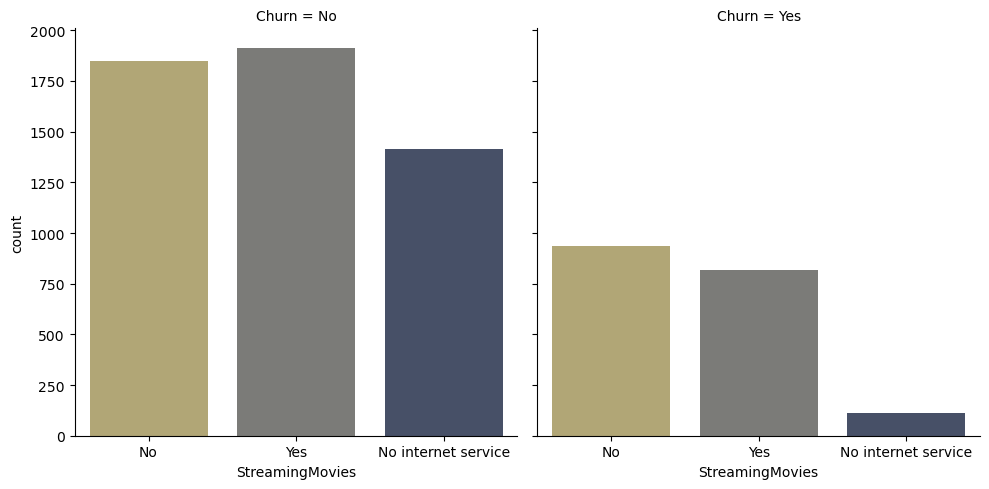

In [59]:
#Checking the churn level and StreamingMovies
sns.catplot(x = 'StreamingMovies', col ='Churn', palette = "cividis_r" ,kind = "count", data=df )
plt.show()

The customer who are existing in the comapany  they do not own StreamingMovies  in their  devices,
and the churn rate is low when the customer do not have internet services.

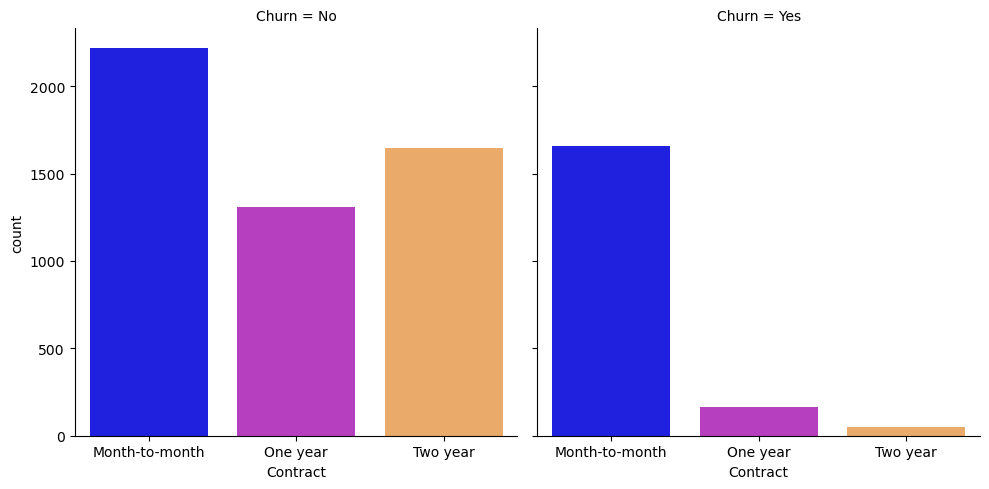

In [60]:
#Checking the churn level and Contract
sns.catplot(x = 'Contract', col ='Churn', palette = "gnuplot2" ,kind = "count", data=df )
plt.show()

The customer who have churned are mostly having month to month contract

# Multivariate Analysis

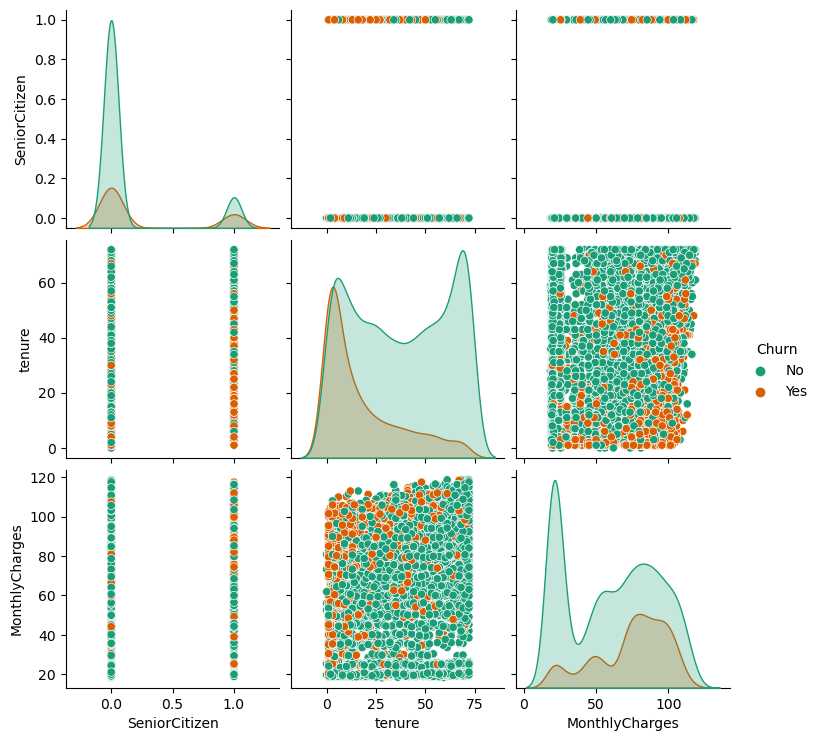

In [61]:
sns.pairplot(df,hue ="Churn",palette = "Dark2")
plt.show()

1.	The pairplot gives the pairwise relation between the features on the basis of the target “Churn” . on the diagonal we can can notice the distribution plots.

2.	The features tenure and TotalCharges, MonthlyCharges and TotalCharges have strong linear relation with each other 

3.	There are no outliers in any of  the columns but let’s plot to identify the outliers.

# Checking for outliers

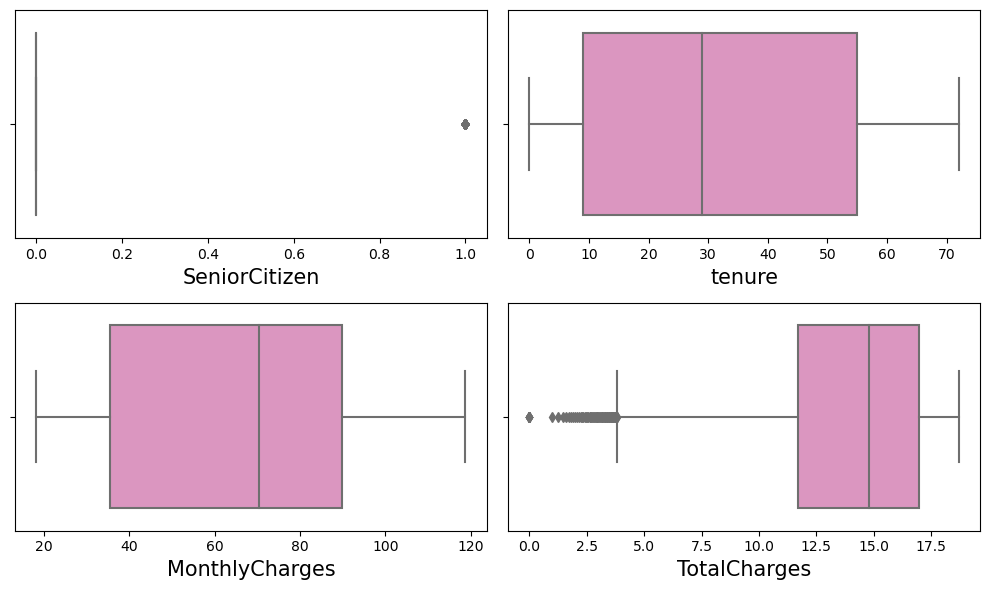

In [114]:
# lets check the outliers by plotting boxplot

plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

The column Senior has outliers but it contains categorical data so no need to remove outliers. Apart from this 
none of the columns have outliers.

To remove outlier we can use 2 methods:
Either IQR method (boxplot) or we can use Zscore method


# Checking for Skewness

In [ ]:
df.skew()

The columns SeniorCitizen and TotalCharges have skewness in the data.Since seniorcitizen no need to remove skewness.
since TotalCharges is continuous in natures, lets ues cube root method to remove skewness.

Default acceptable range for skewness is negative 0.5 to positve 0.5

If skewness value for any feature is 0 it means that data present in the normally distributed and altimate goal is make your data make normally distributed.
Altimate gole is make your data  normally distributes.


# Removing skewness

In [112]:
# Removing skewness using cuberoot method

df['TotalCharges']= np.cbrt(df['TotalCharges'])

we have removed the skewness using cube root method

In [64]:
#Checking skewness again

df.skew()


SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

we can see the skewness has been reduced in TotalCharges column

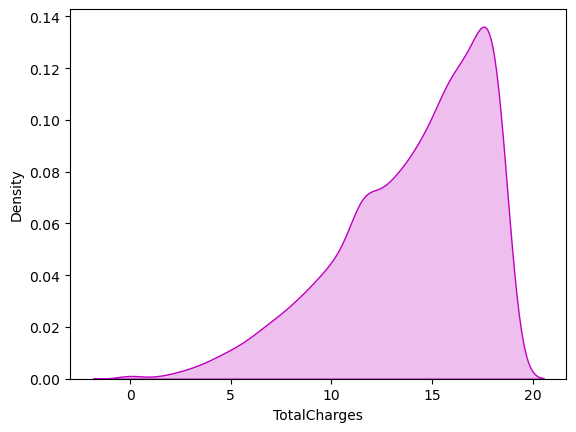

In [113]:
# lets visualize how the data has been disturbuted in TotalCharges after removing  skewness

sns.distplot(df['TotalCharges'], color = "m", kde_kws = {"shade":True},hist = False)
plt.show()

This looks almost normal and skewness is also removed.

# Encoding categorical columns

In [66]:
# Encoding categorical columns using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   float64
 1   gender            7043 non-null   float64
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   float64
 4   Dependents        7043 non-null   float64
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   float64
 7   MultipleLines     7043 non-null   float64
 8   InternetService   7043 non-null   float64
 9   OnlineSecurity    7043 non-null   float64
 10  OnlineBackup      7043 non-null   float64
 11  DeviceProtection  7043 non-null   float64
 12  TechSupport       7043 non-null   float64
 13  StreamingTV       7043 non-null   float64
 14  StreamingMovies   7043 non-null   float64
 15  Contract          7043 non-null   float64
 16  PaperlessBilling  7043 non-null   float64


Here we can see float values are present by default fit encode in the float vlaue.

we have converted the categorical columns into numerical columns using Ordinal Encoding method

In [68]:
# Statistical summary of numerical

df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


After encoding the categorical columns we can see all column details here. The countsof all the columns are same that means no null values in the dataset.

This describing method describe the count, mean, std,min,IQR and max vlaues of all the columns.


# Correlation between target variable and independent variables

In [69]:
# Checking the correlation between feature and the target
cor = df.corr()
cor 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


This gives the correlation between the dependent and independent vatriables. We can visualize this by plotting heatmap.

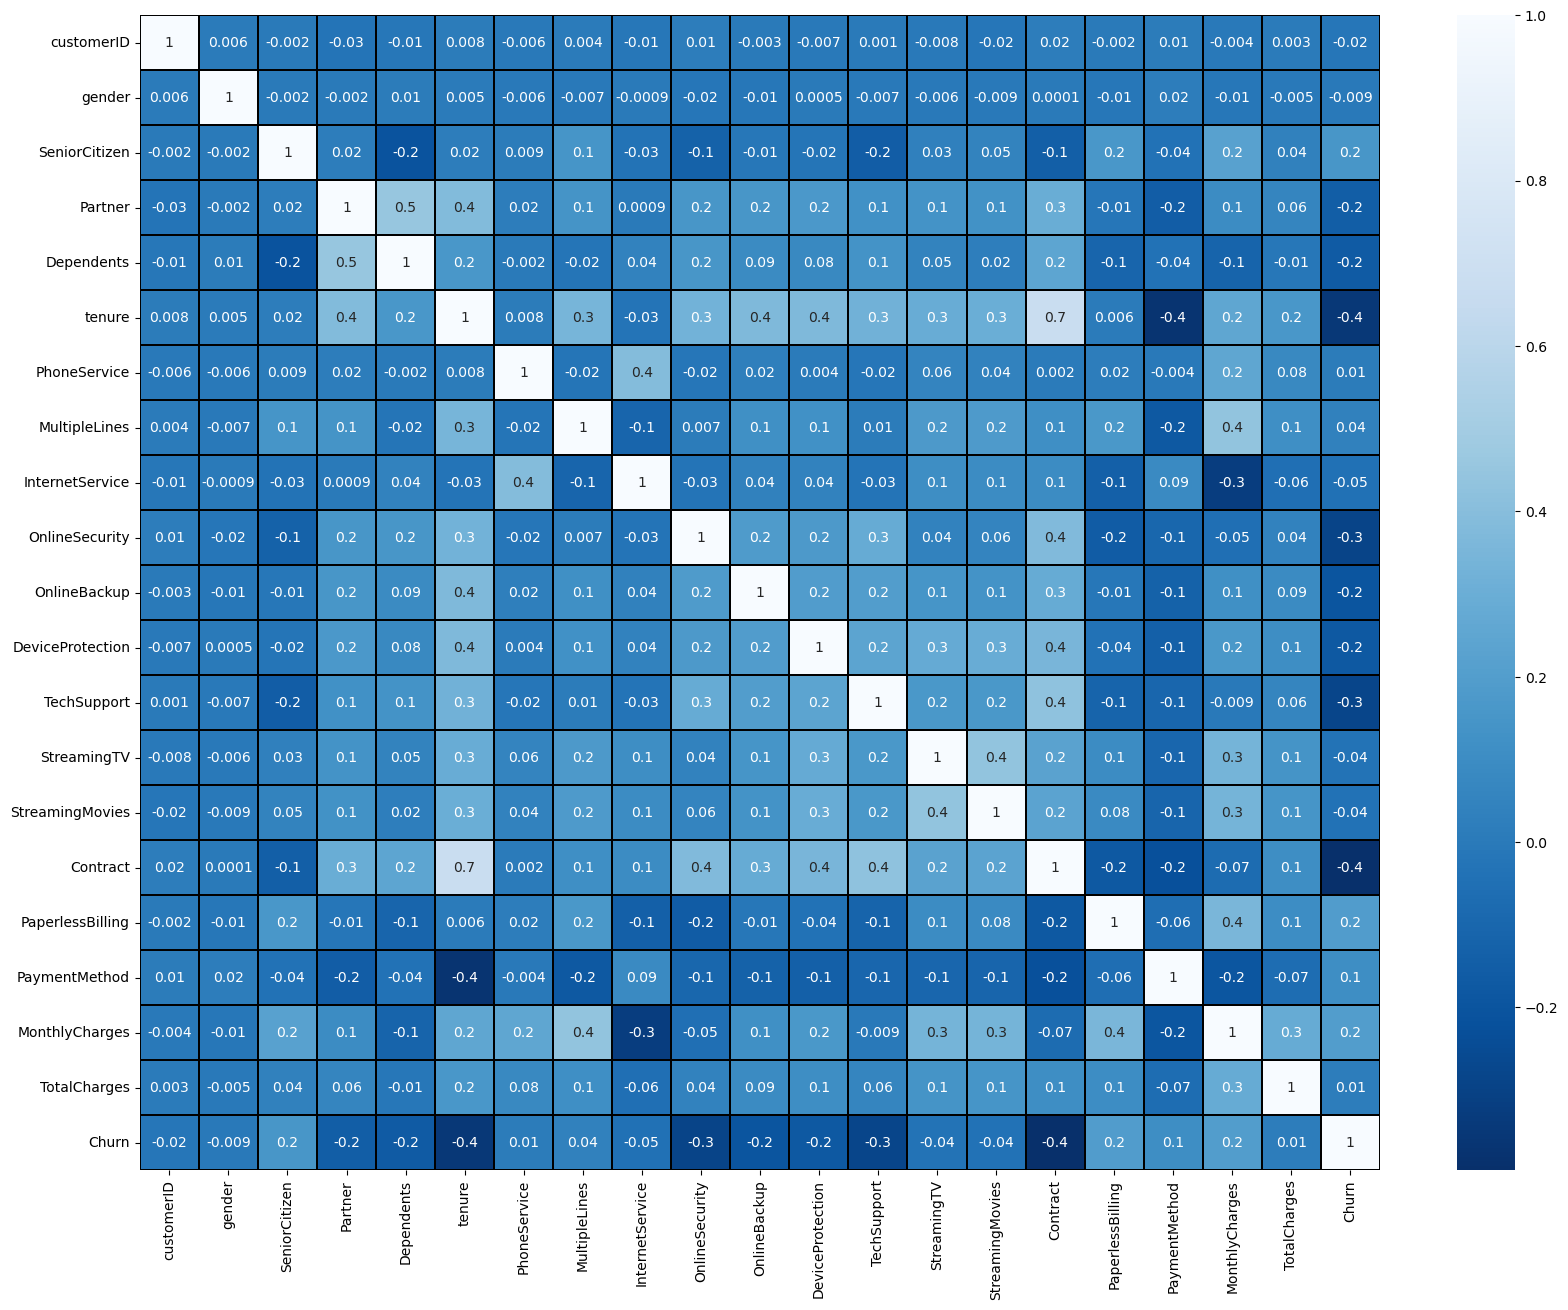

In [70]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt=".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()

# 0- no relation, -0.3 to + 0.3  -less correlation , greater than 0.5 or greater than +0.5 -Moderate correaltion, Greater than -0.7 or greater than +0.7 high correlation 

In [71]:
#0- no relation, -0.3 to + 0.3  -less correlation , greater than 0.5 or greater than +0.5 -Moderate correaltion, Greater than -0.7 or greater than +0.7 high correlation 

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heatmap contains both positive and negative correlation.

1.There is  no much positive correlation between the target and feature

2.The column MonthlyCharges, PaperlessBilling,SeniorCitizen and payment method  have positive correlation with the Label column "Churn.

3.The Label is negatively correlated with Contract,tenure,OnlineSecurity,TechSupport,TotalCharges,DeviceProtection,online backup,Partner and Dependents.

4.Also the column gender has very correlation with the label , we can drop it if necessary 

5.The column TotalCharges and tenure, Contract  and tenure , TotalChages  and MonthlyCharges and many other columns have high correlation with each other.


We can check the correlation of every feature with target variable  by using the sort values: 

In [72]:
cor['Churn'].sort_values(ascending =False )

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

We can observe the positive and negative correlated features with the target.

# Visualizing the correlation between label and features using bar plot

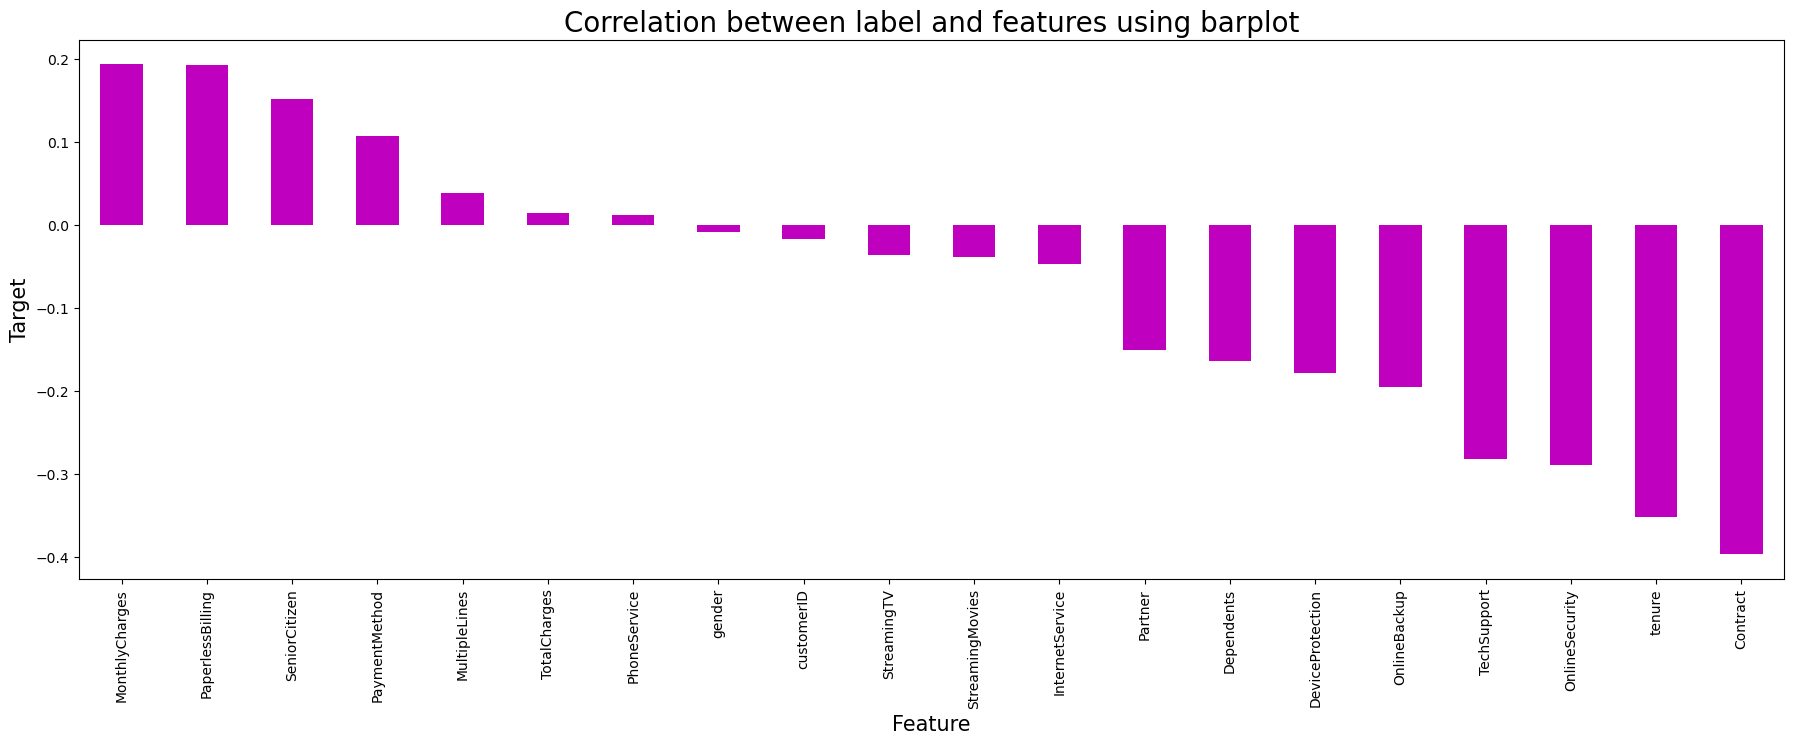

In [73]:
plt.figure(figsize = (22,7))
df.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind ='bar',color ="m")
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features gender and Phoneservice have very less correlation with the column.

# Separating features and  label:

In [74]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

why we are separting the feature and label, we need to separate the features independent variable and dependent variable.so that we can divinde the data set int 4 part

train data : x-train and y-train 

test data: x-test and y -test


# Features Scalling using standard Scalarization

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.911890,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.398608
1,0.216906,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.948762
2,-0.470701,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.641883
3,0.990587,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.983710
4,1.470632,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.235224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655145,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,-0.879397
7039,-0.981733,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.292099
7040,-0.075745,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.139680
7041,1.186835,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.316534


# Checking Variance Inflation Factor(VIF)

In [76]:
# Finding variance inflation factor in each scales columns i.e x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x.values,i)
                   for i in range (len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.002435,customerID
1,1.001719,gender
2,1.149739,SeniorCitizen
3,1.461981,Partner
4,1.382218,Dependents
5,2.754763,tenure
6,1.622292,PhoneService
7,1.392868,MultipleLines
8,1.826783,InternetService
9,1.248006,OnlineSecurity


By checking VIF values we can find the feature causing Multi collinearity problem.Here we can find the feature TotalChages and tenure have VIF value greater than 10 which means they have high correlation with other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.

# Droping TotalCharges column :

In [77]:
# Droping TotalCharges column
x.drop("TotalCharges", axis = 1,inplace = True)

In [78]:
# Again checking VIF values to confirm whether the multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.002428,customerID
1,1.001718,gender
2,1.149640,SeniorCitizen
3,1.461971,Partner
4,1.382123,Dependents
5,2.754697,tenure
6,1.622284,PhoneService
7,1.391687,MultipleLines
8,1.825990,InternetService
9,1.247812,OnlineSecurity


So, we have solved multicollinearity issue. we can now move ahead for model building.

In [79]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

Here we can see that data is not balanced, since it is a classification problem we will balance the data using oversamlping method

# Oversampling method:

In [80]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [120]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 =SM.fit_resample(x,y)


In [82]:
# checking values count of target column

y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [83]:
y1.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

Let me tell you before moving what are the EDA or pre process that need to do in every project.

# Modelling

# Find the best randon state

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS =0

for i in range (1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size = 0.30, random_state =i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is", maxAccu, "at random_state", maxRS) 

Best accuracy is 0.8737520128824476 at random_state 143


The best accuracy is 86.73% at random_state 102

# Creating train test split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state =maxRS)

# Classification Algorithms

In [125]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [88]:
# checking accuracy for RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.7841930903928065
[[1373  156]
 [ 300  284]]
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1529
         1.0       0.65      0.49      0.55       584

    accuracy                           0.78      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.77      0.78      0.77      2113



accuracy for this model  is 79.88 %

# LogisticRegression

In [89]:
# checking accuracy for LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7917652626597255
[[1359  170]
 [ 270  314]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1529
         1.0       0.65      0.54      0.59       584

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



The accuracy score using LogisticRegression is 80.50%

# Support Vector Machine Classifier

In [90]:
# checking accuracy for support Vector Machine classifier

svc = SVC ()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.792238523426408
[[1396  133]
 [ 306  278]]
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1529
         1.0       0.68      0.48      0.56       584

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



The accuracy score using support using support vector Machine Classifer is 81.48%

# Gradient Boosting Classifier

In [91]:
# checking accuracy for Gradient Boosting Classifier
GB= GradientBoostingClassifier()
GB .fit(x_train,y_train)
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.7865593942262187
[[1363  166]
 [ 285  299]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1529
         1.0       0.64      0.51      0.57       584

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



The accuracy_score using Gradient Boosting Classifier is 80.73%

# AdaBoost Classifier

In [92]:
# checking accuracy for AdaBoostClassifier
ABC=  AdaBoostClassifier()
ABC .fit(x_train,y_train)
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.7879791765262659
[[1353  176]
 [ 272  312]]
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1529
         1.0       0.64      0.53      0.58       584

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113



The accuracy_score using  AdaBoost Classifier is 80.97%

# BaggingClassifier

In [93]:
# checking accuracy for BaggingClassifier
BC =  BaggingClassifier()
BC .fit(x_train,y_train)
predBC = BC.predict(x_test)

print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.779460482725982
[[1373  156]
 [ 310  274]]
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.85      1529
         1.0       0.64      0.47      0.54       584

    accuracy                           0.78      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113



The accuracy_score using BaggingClassifier is 78.84%

# Extra TreeClassifier

In [94]:
# checking accuracy for ExtraTreesClassifier
ET=  ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)

print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.7681022243256034
[[1356  173]
 [ 317  267]]
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      1529
         1.0       0.61      0.46      0.52       584

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.75      0.77      0.76      2113



The accuracy_score using ExtraTreesClassifier is 77.80%

# Cross Validiation Score

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
# checking cv score for Random Forest classifier
score = cross_val_score(RFC,x,y)
print(score)   
print(score.mean())
print("Difference between Accuracy score and corss validation score is -", accuracy_score(y_test,predRFC) -score.mean())

[0.79701916 0.7920511  0.76579134 0.78977273 0.81036932]
0.7910007298857991
Difference between Accuracy score and corss validation score is - -0.006807639492992568


In [97]:
# checking cv score for Logistic Regression 

score = cross_val_score(LR,x,y)
print(score)   
print(score.mean())
print("Difference between Accuracy score and corss validation score is -", accuracy_score(y_test,predLR) -score.mean())

[0.80837473 0.81689141 0.78495387 0.80610795 0.80326705]
0.8039190028388928
Difference between Accuracy score and corss validation score is - -0.012153740179167372


In [98]:
# checking cv score for Gradient Boosting Classifier

score = cross_val_score(GB,x,y)
print(score)   
print(score.mean())
print("Difference between Accuracy score and corss validation score is -", accuracy_score(y_test,predGB) -score.mean())

[0.80553584 0.80482612 0.77927608 0.80894886 0.80539773]
0.8007969264146073
Difference between Accuracy score and corss validation score is - -0.014237532188388635


In [99]:
# checking cv score for support Vector Machine classifier

score = cross_val_score(svc,x,y)
print(score)   
print(score.mean())
print("Difference between Accuracy score and corss validation score is -", accuracy_score(y_test,predsvc) -score.mean())

[0.79914833 0.79772889 0.77856636 0.8046875  0.80823864]
0.7976739426737208
Difference between Accuracy score and corss validation score is - -0.005435419247312834


In [100]:
# checking cv score for AdaBoost Classifier

score = cross_val_score(ABC,x,y)
print(score)   
print(score.mean())
print("Difference between Accuracy score and corss validation score is -", accuracy_score(y_test,predABC) -score.mean())

[0.80624556 0.80269695 0.79347055 0.79474432 0.80610795]
0.8006530663268598
Difference between Accuracy score and corss validation score is - -0.012673889800593918


In [101]:
# checking cv score for Bagging Classifier

score = cross_val_score(BC,x,y)
print(score)   
print(score.mean())
print("Difference between Accuracy score and corss validation score is -", accuracy_score(y_test,predBC) -score.mean())

[0.77146913 0.78424414 0.76011356 0.76988636 0.79900568]
0.7769437745983612
Difference between Accuracy score and corss validation score is - 0.002516708127620837


In [102]:
# checking cv score for  Extra Trees Classifier

score = cross_val_score(ET,x,y)
print(score)   
print(score.mean())
print("Difference between Accuracy score and corss validation score is -", accuracy_score(y_test,predET) -score.mean())

[0.79134138 0.77856636 0.76224273 0.77982955 0.79474432]
0.7813448649912897
Difference between Accuracy score and corss validation score is - -0.013242640665686367


Bagging Classifier is our best model as the differnce between accuracy score and cross validation score is least

Bagging Classifier is our best Model

# Hyper Parameter tuning

In [103]:
# Extra Trees classifer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
parameters ={'criterion' : ['gini','entropy'],
            'random_state': [10, 50, 1000],
            'max_depth':[0, 10, 20],
            'n_jobs': [-2, -1, 1],
            'n_estimators': [50, 100, 200, 300]}

In [130]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5,n_jobs=1)

In [131]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [132]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 10}

In [ ]:
0r

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

# Define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'n_estimators': [100, 200, 300],
}

# Create the ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=10)

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Access the best hyperparameters
best_params = grid_search.best_params_

print(best_params)


{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}


In [108]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [111]:
Final_model = ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=200, n_jobs=-2, random_state=10)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc * 100)

77.9460482725982


# Plotting ROC and compare AUC for all the models used

In [ ]:
Plotting ROC and compare AUC for all the models used

In [122]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve  #import plot_roc_curve do not use this libraies 

Do not use below code

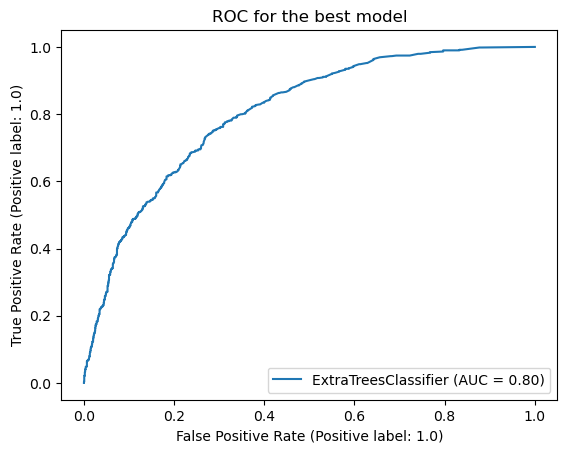

In [123]:
Final_model = ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=200, n_jobs=-2, random_state=10)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
plot_roc_curve(Final_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

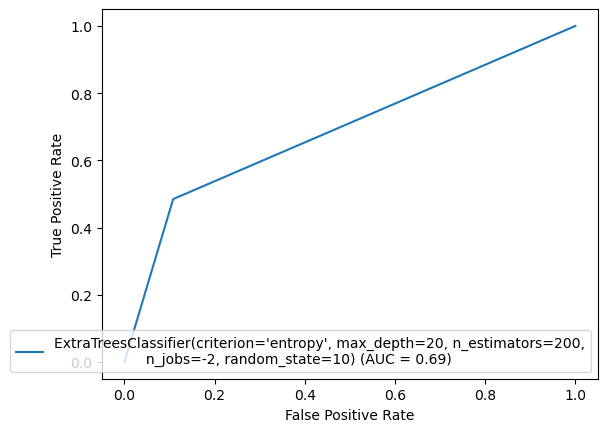

In [124]:
from sklearn import metrics
fpr,tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr =tpr, roc_auc= roc_auc, estimator_name=Final_model)
display.plot()

Here we  have plotted the ROC curve for the final model and AUC value for the best model is 94%.

# Saving the model

In [136]:
#Saving the model using .pkl (pickel)

import joblib

joblib.dump(Final_model, "Telecom_Customer_Churn_Analysis.pkl")

['Telecom_Customer_Churn_Analysis.pkl']

# Predicting the saved model

In [137]:
# lets load the saved model and get the predctions

model=joblib.load("Telecom_Customer_Churn_Analysis.pkl")

#prediction

prediction = model.predict(x_test)
prediction

array([0., 0., 1., ..., 0., 0., 0.])

These are the predicted churned values of the customers

In [138]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
2108,0.0,0.0
2109,0.0,0.0
2110,0.0,0.0
2111,0.0,0.0


# END..........................